# 运动模式

## 求解运动模式

In [1]:
import numpy as np
from scipy.optimize import fsolve
%matplotlib inline
import matplotlib.pyplot as plt
def position(x):
    n = len(x)
    e = np.zeros(n) #n个平衡方程
    for i in range(1,n-1):
        for j in range(0,i):
            e[i] = e[i] - 1/(x[i]-x[j])**2
        for k in range(i+1,n):
            e[i] = e[i] + 1/(x[i]-x[k])**2
        e[i] = e[i] + x[i]
    for i in range(1,n):
        e[0] = e[0] + 1/(x[0]-x[i])**2
    e[0] = e[0] + x[0]
    for i in range(0,n-1):
        e[n-1] = e[n-1] - 1/(x[n-1]-x[i])**2
    e[n-1] = e[n-1] + x[n-1]    
    return(np.array(e))
result = fsolve(position, [0,1,2,3])
print(result)

[-1.43680199 -0.45437928  0.45437928  1.43680199]


## 径向运动模式

In [2]:
# 求解径向频率分布
def Frequence_rr(n,m1,m2,b,b1,b2):  # b为w_r/w_z
#     A_z = np.zeros((n,n)) #展开矩阵
    A_r = np.zeros((n,n))
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
#                 A_z[i][j] = -2/abs(u[i]-u[j])**3
#                 A_z[i][i] = A_z[i][i] + 2/abs(u[i]-u[j])**3
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
#         A_z[i][i] = A_z[i][i] + 1
        A_r[i][i] = A_r[i][i] + b**2
#     A_z[m1][m1] = A_z[m1][m1] + b1**2
    A_r[m1][m1] = A_r[m1][m1] + b1**2 
#     A_z[m2][m2] = A_z[m2][m2] + b3**2
    A_r[m2][m2] = A_r[m2][m2] + b2**2 
#     a_z,b_z = np.linalg.eig(A_z)
    a_r,b_r = np.linalg.eig(A_r)
    return a_r,b_r


# Dipole trap 参数估算

In [3]:
from sympy import *
init_printing()
from scipy.constants import c as c0
from scipy.constants import m_p
from scipy.constants import hbar as h

m,c,omega0,Gamma,Delta,delta, Is, If, w0, hbar, wavelen, w, Pf, Ps = symbols('m, c, \omega_0, \Gamma,\Delta,\delta, I_s, I_f , \sigma,\hbar,\lambda,w,P_f,P_s ')
# omega0, 共振角频率
# w0     激光的半峰宽

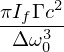

In [4]:
# foucs 场，提供局域tailor 势能
U_dip_f = pi*c**2*Gamma*If/(omega0**3*Delta)
U_dip_f 

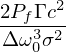

In [5]:
I_f = 2*Pf/(pi*w0**2)
U_f = U_dip_f.subs({If:I_f})
U_f

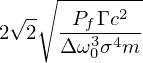

In [6]:
W_f = sqrt(4*U_f/(m*w0**2))
W_f

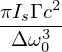

In [7]:
# standing wave 场，用于提供spin-dependent force
U_dip_s = pi*c**2*Gamma*Is/(omega0**3*Delta)
U_dip_s 

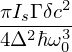

In [8]:
Omega_dip_s = pi*c**2*Gamma*Is*delta/(4*omega0**3*Delta**2*hbar)
Omega_dip_s

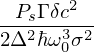

In [9]:
I_s = 2*Ps/(pi*w0**2)
U_s = U_dip_s.subs({Is:I_s})
Omega_s = Omega_dip_s.subs({Is:I_s})
Omega_s

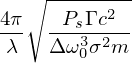

In [10]:
W_s = 2*pi/wavelen*sqrt(2*U_s/(m))
W_s

In [11]:
paras={
    Gamma: 20e6*2*pi,
    omega0: 2*pi*c/(0.369e-6),
    Delta: 2*pi*200e9,
    w0:    0.5e-6,
    m:     171*m_p,
    Pf:     1e-3,
    Ps:     1e-3,
    delta: 2*pi*12.6e9,
    c:  c0,
    wavelen: (0.369e-6),
    delta:   2*pi*12.6e9,
    hbar: h
}

Omega_S = N(Omega_s.subs(paras)/(2*pi))
print(Omega_S/1e6)

V_f = N(W_f.subs(paras)/(2*pi))
print(V_f/1e6)

12.8479344853350
0.875160217145379


In [12]:
c_lamb = 2*(2*pi/wavelen)*sqrt(hbar/(2*m))
c_lamb = float(N(c_lamb.subs(paras)))
c_lamb
## yeta = c_lamb/sqrt(w)

# 上面的结果说明 在光强为1mW, 聚焦到 0.5um 时 Omega_sdf 频率可以达到 2$\pi$10 MHz量级，tailor 频率可以达到 2$\pi$1 MHz 量级。而且需要注意到一点：$\Omega_{sdf}$的上升与P_s为正比关系，tailor频率与P_f成根号关系

# 积分

In [13]:
def f2(w,u,t1,t2,p): ## t1>t2
    x = 0
    x = x - (u + w) * np.sin(p + t1 * (u - w))
    x = x + (u + w) * np.sin(p + t2 * (u - w))
    x = x + (u - w) * np.sin(p + t1 * (u + w))
    x = x - (u - w) * np.sin(p + t2 * (u + w))
    return -1/(2 * (u - w)*(u + w)) * x
# p 方向displacement要用的积分
f2(1,1.7,2,1,1)

In [14]:
def f1(w,u,t1,t2,p):
    x = 0
    x = x + (u + w) * np.cos(p + t1 * (u - w))
    x = x - (u + w) * np.cos(p + t2 * (u - w))
    x = x + (u - w) * np.cos(p + t1 * (u + w))
    x = x - (u - w) * np.cos(p + t2 * (u + w))
    return -1/(2 * (u - w) * (u + w)) * x
# x 方向displacement要用的积分
f1(2.5,2,2,1,0.5)

In [15]:
def f3(w,u,t1,t2,p):
    x = 0
    x = x - w * (u + w) * (np.cos(p + t1*(u-w)) - np.cos(p + t2*(u-w))) * np.sin(p)
    x = x - w * (u - w) * (np.cos(p + t1*(u+w)) - np.cos(p + t2*(u+w))) * np.sin(p)
    x = x + u * (u + w) * (np.sin(p + t1*(u-w)) - np.sin(p + t2*(u-w))) * np.cos(p)
    x = x - u * (u - w) * (np.sin(p + t1*(u+w)) - np.sin(p + t2*(u+w))) * np.cos(p)
    x = x - (u - w) * (u + w) * w * (t1 - t2)
    x = x + (u - w) * (u + w) * w * (np.sin(2*(p + t1*u)) - np.sin(2*(p + t2*u)))/(2*u)
    return 1/(2 *  (u - w)**2 * (u + w)**2) * x
# 积累出的相位要用的积分    
f3(3,1,2,1,2.5)

# coupling

In [16]:
def Coupling(n,n1,n2,b,w1,w2): #n1,n2 为加上激光的离子，n为离子总数,返回耦合系数，解出的频率本征值，频率本征态
    g = np.zeros((2,n))
    b1 = w1/(2*np.pi*1e5)
    b2 = w2/(2*np.pi*1e5)
    F = Frequence_rr(n,n1,n2,b,b1,b2)
    w_r = np.sqrt(F[0])*2*np.pi*1e5 
    b_r = F[1].T
    for i in range(0,n): ##第i个模式与第n1,n2个离子耦合
        g[0][i] = c_lamb * b_r[i][n1] / np.sqrt(w_r[i])
        g[1][i] = c_lamb * b_r[i][n2] / np.sqrt(w_r[i])
    return g,w_r,b_r

# displacement

In [17]:
def Displace(g,w_r,t_list,phi_list,u): # tao为门时间，u为激光之间失谐, 返回失谐模平方
    n = len(w_r)
    m = len(phi_list)
    a = np.zeros((2,n))
    for i in range(0,n):
        jf1 = 0
        jf2 = 0
        for j in range(0,m): 
            jf1 = jf1 + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf2 = jf2 + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        a[0][i] = g[0][i]**2 * (jf1**2 + jf2**2)
        a[1][i] = g[1][i]**2 * (jf1**2 + jf2**2)
    return a

# Phi

In [18]:
def Phi(g,w_r,t_list,phi_list,u):
    n = len(w_r)
    m = len(phi_list)
    phi = 0
    for i in range(0,n):
        jf = 0
        for j in range(0,m):
            jf  = jf + f3(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        phi = phi + 2*g[0][i]*g[1][i]*jf
    return phi

## 固定频率，可变的参数为时间与相位角

In [19]:
# def Fie(n,n1,n2,b,para,tao,Np,u): #计算严格求解的非保真度，在考虑局域势的效益下，para是所有参数，tao是总时间，u是失谐，Np是门之前剩余热分布
#     u = u * 2 * np.pi * 1e6
#     w1 = para[0] * 1e6 * 2 * np.pi
#     w2 = para[1] * 1e6 * 2 * np.pi
#     t_list = (np.array([0,para[2],tao/2,tao-para[2],tao])*1e-6).tolist()
#     phi_list = [para[3],para[4],-para[4],-para[3]]
#     C = Coupling(n,n1,n2,b,w1,w2)
#     b_r = C[2]
#     Omega_pf = np.pi / ( 4 * abs(Phi(C[0],C[1],t_list,phi_list,u)) ) 
#     D = (Displace(C[0],C[1],t_list,phi_list,u)[0] + Displace(C[0],C[1],t_list,phi_list,u)[1]) * Omega_pf  
#     F = 1/3 + 1/2
#     for i in range(0,n):
#           F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])    
#     return F,D,C[1]/(2*np.pi*1e6),np.sqrt(Omega_pf)/(2*np.pi*1e6)
def Fie(n,n1,n2,b,w1,w2,para,tao,Np,u): #计算严格求解的非保真度，在考虑局域势的效益下，para是所有参数，tao是总时间，u是失谐，Np是门之前剩余热分布
    u = u * 2 * np.pi * 1e6
    w1 = w1 * 1e6 * 2 * np.pi
    w2 = w2 * 1e6 * 2 * np.pi
    t_list = (np.array([0,para[0],tao/2,tao-para[0],tao])*1e-6).tolist()
    phi_list = [para[1],para[2],-para[2],-para[1]]
    C = Coupling(n,n1,n2,b,w1,w2)
    b_r = C[2]
    Omega_pf = np.pi / ( 4 * abs(Phi(C[0],C[1],t_list,phi_list,u)) ) 
    D = (Displace(C[0],C[1],t_list,phi_list,u)[0] + Displace(C[0],C[1],t_list,phi_list,u)[1]) * Omega_pf  
    F = 1/3 + 1/2
    for i in range(0,n):
          F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])    
    return F,D,C[1]/(2*np.pi*1e6),np.sqrt(Omega_pf)/(2*np.pi*1e6)

In [20]:
x0 = [2,1,0.5] # 3个参数分别为 两个离子的tailor频率，优化时间参数1个，优化相位参数2个
u = 2.08
Fie(10,4,5,5,2,2,x0,4,np.ones(10),u)

(0.9666666539226627,
 array([4.60331066e+00, 5.92853506e+00, 1.68361278e-05, 2.38097621e-05,
        2.66771073e-06, 1.06422832e-06, 1.03220267e-05, 5.61738984e-06,
        2.44622179e-05, 1.57043168e-05]),
 array([2.04427986, 2.0167703 , 0.29943589, 0.30087913, 0.49039135,
        0.4890951 , 0.45399209, 0.45237969, 0.3948548 , 0.39326509]),
 1.838874956600971)

In [21]:
from scipy.optimize import minimize
(2.04427986+2.0167703)/2

### 轨迹函数

In [22]:
def traject(n,n1,n2,b,w1,w2,para,tao,Np,u):
    u = u * 2 * np.pi * 1e6
    w1 = w1 * 1e6 * 2 * np.pi
    w2 = w2 * 1e6 * 2 * np.pi
    t_list = (np.array([0,para[0],tao/2,tao-para[0],tao])*1e-6).tolist()
    phi_list = [para[1],para[2],-para[2],-para[1]]
    C = Coupling(n,n1,n2,b,w1,w2)
    g = C[0]
    w_r = C[1]
    Omega = np.sqrt(np.pi / ( 4 * abs(Phi(C[0],C[1],t_list,phi_list,u)) ))
    a = np.zeros((6,n,300))
    k0 = 0
    flag = 0
    T = np.linspace(0,tao-0.00001,300)
    for k,t in enumerate(T):
        pos = 0
        while (t*1e-6 >= t_list[pos]):
            pos = pos+1
            if pos == 2 and flag == 0:
                k0 = k
                flag = 1
        for i in range(0,n):
            jf_x = 0
            jf_y = 0
            for j in range(0,pos-1): 
                jf_x = jf_x + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
                jf_y = jf_y + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf_x = jf_x + f1(w_r[i],u,t*1e-6,t_list[pos-1],phi_list[pos-1])
            jf_y = jf_y + f2(w_r[i],u,t*1e-6,t_list[pos-1],phi_list[pos-1])
            a[0][i][k] = g[0][i] * jf_x * Omega # 第一个离子第i个模式x方向位移
            a[1][i][k] = g[0][i] * jf_y * Omega
            a[2][i][k] = g[1][i] * jf_x * Omega
            a[3][i][k] = g[1][i] * jf_y * Omega

    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.plot(a[0][0][0:k0-1],a[1][0][0:k0-1])
    plt.plot(a[0][0][k0-1:150],a[1][0][k0-1:150])
    plt.plot(a[0][0][150:300-k0],a[1][0][150:300-k0])
    plt.plot(a[0][0][300-k0:300],a[1][0][300-k0:300])
    plt.plot(a[0][0][0],a[1][0][0],'*')
    plt.plot(a[0][0][299],a[1][0][299],'*')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
#     plt.xlim(-2.5,2.5)
#     plt.ylim(-2.5,2.5)
    plt.subplot(2,2,2)
    plt.plot(a[0][1][0:k0],a[1][1][0:k0])
    plt.plot(a[0][1][k0:150],a[1][1][k0:150])
    plt.plot(a[0][1][150:300-k0],a[1][1][150:300-k0])
    plt.plot(a[0][1][300-k0:300],a[1][1][300-k0:300])
    plt.plot(a[0][1][0],a[1][1][0],'*')
    plt.plot(a[0][1][299],a[1][1][299],'*')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.subplot(2,2,3)
    plt.plot(a[0][0]+a[2][0],a[1][0]+a[3][0])
    plt.plot(a[0][0][0]+a[2][0][0],a[1][0][0]+a[3][0][0],'*')
    plt.plot(a[0][0][299]+a[2][0][299],a[1][0][299]+a[3][0][299],'*')
    plt.subplot(2,2,4)
    plt.plot(a[0][1]+a[2][1],a[1][1]+a[3][1])
    plt.plot(a[0][1][0]+a[2][1][0],a[1][1][0]+a[3][1][0],'*')
    plt.plot(a[0][1][299]+a[2][1][299],a[1][1][299]+a[3][1][299],'*')
#     plt.xlim(-1.5,1.5)
#     plt.ylim(-1.5,1.5)
#     plt.subplot(2,2,3)
#     plt.plot(a[2][0][0:k0],a[3][0][0:k0])
#     plt.plot(a[2][0][k0:150],a[3][0][k0:150])
#     plt.plot(a[2][0][150:300-k0],a[3][0][150:300-k0])
#     plt.plot(a[2][0][300-k0:300],a[3][0][300-k0:300])
#     plt.plot(a[2][0][0],a[3][0][0],'*')
#     plt.plot(a[2][0][299],a[3][0][299],'*')
#     plt.xlim(-1.5,1.5)
#     plt.ylim(-1.5,1.5)
#     plt.subplot(2,2,4)
#     plt.plot(a[2][1][0:k0],a[3][1][0:k0])
#     plt.plot(a[2][1][k0:150],a[3][1][k0:150])
#     plt.plot(a[2][1][150:300-k0],a[3][1][150:300-k0])
#     plt.plot(a[2][1][300-k0:300],a[3][1][300-k0:300])
#     plt.plot(a[2][1][0],a[3][1][0],'*')
#     plt.plot(a[2][1][299],a[3][1][299],'*')
#     plt.xlim(-1.5,1.5)
#     plt.ylim(-1.5,1.5)
#     plt.subplot(3,2,3)
#     plt.plot(a[2][0],a[3][0])
#     plt.plot(a[2][0][0],a[3][0][0],'*')
#     plt.plot(a[2][0][199],a[3][0][199],'*')
#     plt.subplot(3,2,4)
#     plt.plot(a[2][1],a[3][1])
#     plt.plot(a[2][1][0],a[3][1][0],'*')
#     plt.plot(a[2][1][199],a[3][1][199],'*')
#     plt.subplot(3,2,5)
#     plt.plot(a[4][1],a[3][1])
#     plt.plot(a[2][1][0],a[3][1][0],'*')
#     plt.plot(a[2][1][199],a[3][1][199],'*')

    

### 加入diploe的频率为 $2\pi 2 MHz,时间为5us 结果$

True
[0.15439315 0.98728781 1.1999174 ]
[1.04990387e-15 1.31995046e-16 4.98003063e-05 6.93323483e-05
 3.17637350e-06 1.25592440e-06 5.79668280e-06 2.96911807e-06
 1.28263202e-06 1.04038412e-06]
0.9999999809388651
4.421763095998306


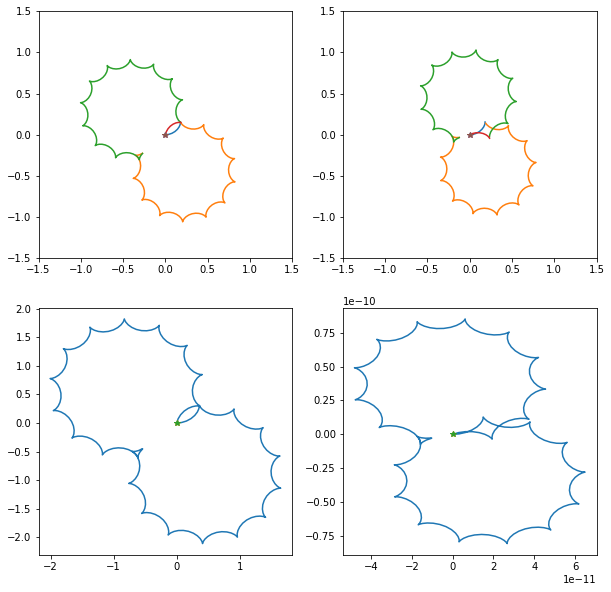

In [205]:
Np = np.ones(10)
x0 = [1,0,0] 
u = 2.4
res = minimize(lambda x: (Fie(10,4,5,5,2,2,x,5,np.ones(10),u)[1][0]+Fie(10,4,5,5,2,2,x,5,np.ones(10),u)[1][1]),x0,tol=1e-7)
print(res.success)
print(res.x)
print(Fie(10,4,5,5,2,2,res.x,5,np.ones(10),u)[1])
print(Fie(10,4,5,5,2,2,res.x,5,np.ones(10),u)[0])
print(Fie(10,4,5,5,2,2,res.x,5,np.ones(10),u)[3])
traject(10,4,5,5,2,2,res.x,5,Np,u)

False
[ 0.5009963  -0.69949413  0.81013005]
[1.50074169e-05 4.24221366e-05 9.88904118e-05 1.40366664e-04
 9.53571731e-05 3.72918220e-05 2.10828967e-04 1.12042109e-04
 2.40333178e-04 1.51967663e-04]
0.9998852847879679
9.866141697626187


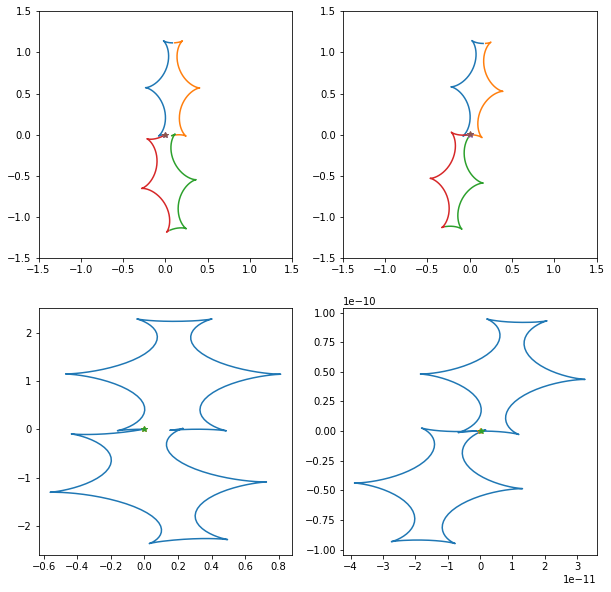

In [206]:
t = 2
x0 = [0.5,-0.4,0.3] 
u = 2.54
res = minimize(lambda x: sum(Fie(10,4,5,5,2,2,x,t,np.ones(10),u)[1])+5*(Fie(10,4,5,5,2,2,x,t,np.ones(10),u)[1][0]+Fie(10,4,5,5,2,2,x,t,np.ones(10),u)[1][1]),x0,tol=1e-7)
print(res.success)
print(res.x)
print(Fie(10,4,5,5,2,2,res.x,t,np.ones(10),u)[1])
print(Fie(10,4,5,5,2,2,res.x,t,np.ones(10),u)[0])
print(Fie(10,4,5,5,2,2,res.x,t,np.ones(10),u)[3])
traject(10,4,5,5,2,2,res.x,t,Np,u)

### 加入diploe的频率为 $2\pi 2 MHz,时间为4us 结果$

False
[ 0.94613592 -1.07574283 -1.22351628]
[1.71385266e-03 2.39871598e-04 7.31779466e-04 1.01504123e-03
 6.40496882e-07 2.80930118e-07 1.84799644e-05 1.06928230e-05
 2.18315798e-04 1.44750494e-04]
0.9964292878962008
5.396758139997744


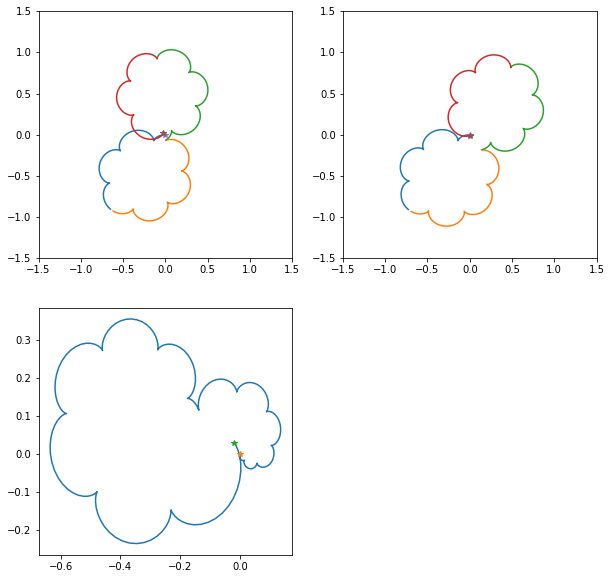

In [197]:
x0 = [1,0,0] 
u = 1.57
res = minimize(lambda x: sum(Fie(10,4,5,5,2,2,x,4,np.ones(10),u)[1])+(Fie(10,4,5,5,2,2,x,4,np.ones(10),u)[1][0]+Fie(10,4,5,5,2,2,x,4,np.ones(10),u)[1][1]),x0,tol=1e-10)
print(res.success)
print(res.x)
print(Fie(10,4,5,5,2,2,res.x,4,np.ones(10),u)[1])
print(Fie(10,4,5,5,2,2,res.x,4,np.ones(10),u)[0])
print(Fie(10,4,5,5,2,2,res.x,4,np.ones(10),u)[3])
traject(10,4,5,5,2,2,res.x,4,Np,u)


In [198]:
x0 = [1,0,0] 
u = 2.231
res = minimize(lambda x: sum(Fie(10,4,5,5,2,2,x,5,np.ones(10),u)[1])+(Fie(10,4,5,5,2,2,x,5,np.ones(10),u)[1][0]+Fie(10,4,5,5,2,2,x,5,np.ones(10),u)[1][1]),x0,tol=1e-10)
print(res.success)
print(res.x)
print(Fie(10,4,5,5,2,2,res.x,5,np.ones(10),u)[1])
print(Fie(10,4,5,5,2,2,res.x,5,np.ones(10),u)[0])
print(Fie(10,4,5,5,2,2,res.x,5,np.ones(10),u)[3])


False
[ 1.18062168 -0.93840949  0.35121392]
[6.65417903e-06 7.57345306e-06 9.81585234e-06 1.34071942e-05
 1.39416199e-06 5.37997916e-07 1.96304750e-06 1.02111006e-06
 1.78432800e-06 1.15354175e-06]
0.9999715579589707
2.1521909493809965


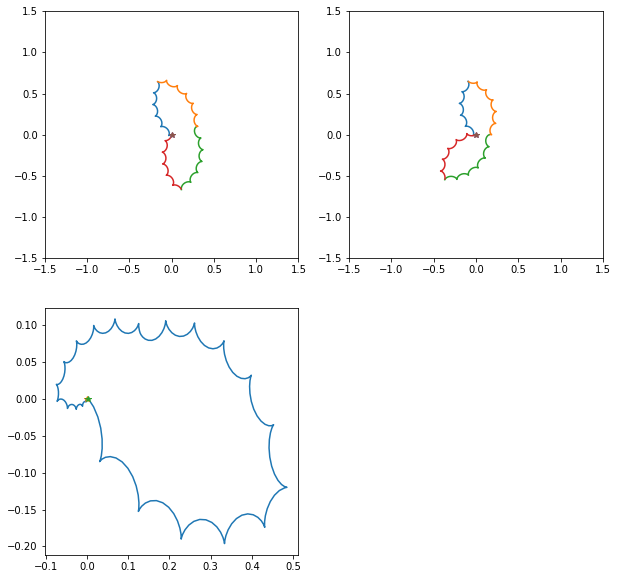

In [200]:
traject(10,4,5,5,2,2,res.x,5,Np,u)

### 加入diploe的频率为 $2\pi 2 MHz,时间为6us 结果$

False
[ 0.50030528 -0.63366371  0.75305965]
[2.78418292e-03 5.88001692e-03 1.19737191e-04 1.75299137e-04
 3.24417476e-05 1.21044752e-05 3.52726726e-06 1.48409296e-06
 1.89759993e-04 1.26046023e-04]
0.9868315203078111
6.89044029416735


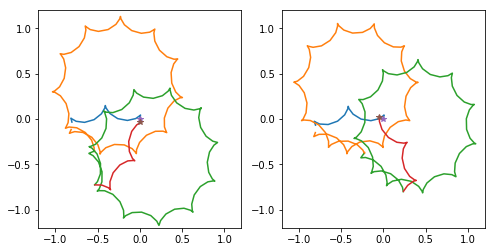

In [333]:
x0 = [1,0,0] 
u = 2.49
res = minimize(lambda x: sum(Fie(10,4,5,5,2,2,x,6,np.ones(10),u)[1])+4*(Fie(10,4,5,5,2,2,x,6,np.ones(10),u)[1][0]+Fie(10,4,5,5,2,2,x,6,np.ones(10),u)[1][1]),x0,tol=1e-7)
print(res.success)
print(res.x)
print(Fie(10,4,5,5,2,2,res.x,6,np.ones(10),u)[1])
print(Fie(10,4,5,5,2,2,res.x,6,np.ones(10),u)[0])
print(Fie(10,4,5,5,2,2,res.x,6,np.ones(10),u)[3])
traject(10,4,5,5,2,2,res.x,6,Np,u)

## 尝试只优化一个相位

In [59]:
def Fie_2(n,n1,n2,b,w1,w2,p,tao,Np,u): #计算严格求解的非保真度，在考虑局域势的效益下，para是所有参数，tao是总时间，u是失谐，Np是门之前剩余热分布
    u = u * 2 * np.pi * 1e6
    w1 = w1 * 1e6 * 2 * np.pi
    w2 = w2 * 1e6 * 2 * np.pi
    t_list = (np.array([0,tao/2,tao])*1e-6).tolist()
    phi_list = [p,-p]
    C = Coupling(n,n1,n2,b,w1,w2)
    b_r = C[2]
    Omega_pf = np.pi / ( 4 * abs(Phi(C[0],C[1],t_list,phi_list,u)) ) 
    D = (Displace(C[0],C[1],t_list,phi_list,u)[0] + Displace(C[0],C[1],t_list,phi_list,u)[1]) * Omega_pf  
    F = 1/3 + 1/2
    for i in range(0,n):
          F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])    
    return F,D,C[1]/(2*np.pi*1e6),np.sqrt(Omega_pf)/(2*np.pi*1e6)

In [60]:
def traject_2(n,n1,n2,b,w1,w2,p,tao,Np,u):
    u = u * 2 * np.pi * 1e6
    w1 = w1 * 1e6 * 2 * np.pi
    w2 = w2 * 1e6 * 2 * np.pi
    t_list = (np.array([0,tao/2,tao])*1e-6).tolist()
    phi_list = [p,-p]
    C = Coupling(n,n1,n2,b,w1,w2)
    g = C[0]
    w_r = C[1]
    Omega = np.sqrt(np.pi / ( 4 * abs(Phi(C[0],C[1],t_list,phi_list,u)) ))
    a = np.zeros((6,n,200))
    T = np.linspace(0,tao-0.00001,200)
    for k,t in enumerate(T):
        pos = 0
        while (t*1e-6 >= t_list[pos]):
            pos = pos+1
        for i in range(0,n):
            jf_x = 0
            jf_y = 0
            for j in range(0,pos-1): 
                jf_x = jf_x + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
                jf_y = jf_y + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf_x = jf_x + f1(w_r[i],u,t*1e-6,t_list[pos-1],phi_list[pos-1])
            jf_y = jf_y + f2(w_r[i],u,t*1e-6,t_list[pos-1],phi_list[pos-1])
            a[0][i][k] = g[0][i] * jf_x * Omega # 第一个离子第i个模式x方向位移
            a[1][i][k] = g[0][i] * jf_y * Omega
            a[2][i][k] = g[1][i] * jf_x * Omega
            a[3][i][k] = g[1][i] * jf_y * Omega

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(a[0][0][0:100],a[1][0][0:100])
    plt.plot(a[0][0][100:200],a[1][0][100:200])
    plt.plot(a[0][0][0],a[1][0][0],'*')
    plt.plot(a[0][0][199],a[1][0][199],'*')
#     plt.xlim(-2,2)
#     plt.ylim(-2,2)
    plt.subplot(1,2,2)
    plt.plot(a[0][1][0:100],a[1][1][0:100])
    plt.plot(a[0][1][100:200],a[1][1][100:200])
    plt.plot(a[0][1][0],a[1][1][0],'*')
    plt.plot(a[0][1][199],a[1][1][199],'*')
#     plt.xlim(-2,2)
#     plt.ylim(-2,2)
#     plt.subplot(3,2,3)
#     plt.plot(a[2][0],a[3][0])
#     plt.plot(a[2][0][0],a[3][0][0],'*')
#     plt.plot(a[2][0][199],a[3][0][199],'*')
#     plt.subplot(3,2,4)
#     plt.plot(a[2][1],a[3][1])
#     plt.plot(a[2][1][0],a[3][1][0],'*')
#     plt.plot(a[2][1][199],a[3][1][199],'*')
#     plt.subplot(3,2,5)
#     plt.plot(a[4][1],a[3][1])
#     plt.plot(a[2][1][0],a[3][1][0],'*')
#     plt.plot(a[2][1][199],a[3][1][199],'*')

    

False
[0.05406062]
[8.47361909e-02 1.06089640e-01 1.37598928e-05 1.93058046e-05
 2.79199758e-06 1.08309121e-06 3.73740218e-06 1.91542041e-06
 2.97700902e-06 2.00370103e-06]
0.9666673507849382
[2.30282102]


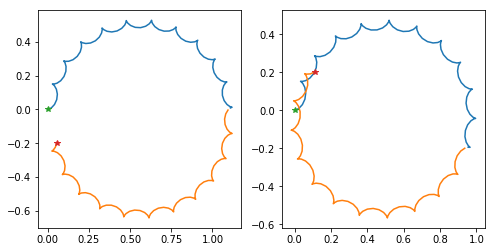

In [61]:
t = 2
p = 0.6
u = 2.24
res = minimize(lambda P: 100*(Fie_2(10,4,5,5,2,t,P,5,np.ones(10),u)[1][0]+Fie_2(10,4,5,5,2,t,P,5,np.ones(10),u)[1][1]),p,tol=1e-10)
print(res.success)
print(res.x)
print(Fie_2(10,4,5,5,2,t,res.x,5,np.ones(10),u)[1])
print(Fie_2(10,4,5,5,2,t,res.x,5,np.ones(10),u)[0])
print(Fie_2(10,4,5,5,2,t,res.x,5,np.ones(10),u)[3])
traject_2(10,4,5,5,2,t,res.x,5,Np,u)

2.318428247448259


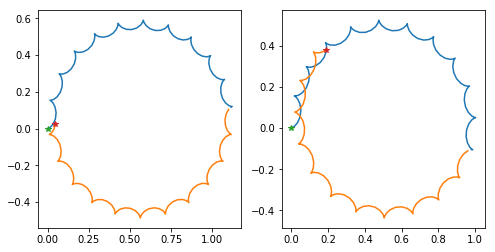

In [62]:
t = 2
u = 2.24
p = -0.05
print(Fie_2(10,4,5,5,2,t,p,5,np.ones(10),u)[3])
traject_2(10,4,5,5,2,t,p,5,Np,u)

In [182]:
def Fie_3(n,n1,n2,b,w1,w2,para,tao,Np,u): #计算严格求解的非保真度，在考虑局域势的效益下，para是所有参数，tao是总时间，u是失谐，Np是门之前剩余热分布
    u = u * 2 * np.pi * 1e6
    w1 = w1 * 1e6 * 2 * np.pi
    w2 = w2 * 1e6 * 2 * np.pi
#     t_list = (np.array([0,para[0],para[1]+para[0],tao-para[1]-para[0],tao-para[0],tao])*1e-6).tolist()
#     phi_list = [para[2],para[3],para[4],para[3],para[2]]
#     t_list = (np.array([0,para[0],para[1]+para[0],para[2]+para[1]+para[0],tao-para[2]-para[1]-para[0],tao-para[1]-para[0],para[0],tao])*1e-6).tolist()
#     phi_list = [para[3],para[4],para[5],para[6],para[5],para[4],para[3]]
    t_list = (np.array([0,para[0],para[1]+para[0],tao])*1e-6).tolist()
    phi_list = [para[2],para[3],para[4]]
    C = Coupling(n,n1,n2,b,w1,w2)
    b_r = C[2]
    Omega_pf = np.pi / ( 4 * abs(Phi(C[0],C[1],t_list,phi_list,u)) ) 
    D = (Displace(C[0],C[1],t_list,phi_list,u)[0] + Displace(C[0],C[1],t_list,phi_list,u)[1]) * Omega_pf  
    F = 1/3 + 1/2
    for i in range(0,n):
          F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])    
    return F,D,C[1]/(2*np.pi*1e6),np.sqrt(Omega_pf)/(2*np.pi*1e6)

In [190]:
def traject_3(n,n1,n2,b,w1,w2,para,tao,Np,u):
    u = u * 2 * np.pi * 1e6
    w1 = w1 * 1e6 * 2 * np.pi
    w2 = w2 * 1e6 * 2 * np.pi
#     t_list = (np.array([0,para[0],para[1]+para[0],tao-para[1]-para[0],tao-para[0],tao])*1e-6).tolist()
#     phi_list = [para[2],para[3],para[4],para[3],para[2]]
#     t_list = (np.array([0,para[0],para[1]+para[0],para[2]+para[1]+para[0],tao-para[2]-para[1]-para[0],tao-para[1]-para[0],para[0],tao])*1e-6).tolist()
#     phi_list = [para[3],para[4],para[5],para[6],para[5],para[4],para[3]]
#     C = Coupling(n,n1,n2,b,w1,w2)
    t_list = (np.array([0,para[0],para[1]+para[0],tao])*1e-6).tolist()
    phi_list = [para[2],para[3],para[4]]
    C = Coupling(n,n1,n2,b,w1,w2)
    g = C[0]
    w_r = C[1]
    Omega = np.sqrt(np.pi / ( 4 * abs(Phi(C[0],C[1],t_list,phi_list,u)) ))
    a = np.zeros((6,n,300))
    k0 = 0
    flag0 = 0
    k1 = 0
    flag1 = 0
    T = np.linspace(0,tao-0.00001,300)
    for k,t in enumerate(T):
        pos = 0
        while (t*1e-6 >= t_list[pos]):
            pos = pos+1
            if pos == 2 and flag0 == 0:
                k0 = k
                flag0 = 1
            if pos == 3 and flag1 == 0:
                k1 = k
                flag1 = 1
        for i in range(0,n):
            jf_x = 0
            jf_y = 0
            for j in range(0,pos-1): 
                jf_x = jf_x + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
                jf_y = jf_y + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf_x = jf_x + f1(w_r[i],u,t*1e-6,t_list[pos-1],phi_list[pos-1])
            jf_y = jf_y + f2(w_r[i],u,t*1e-6,t_list[pos-1],phi_list[pos-1])
            a[0][i][k] = g[0][i] * jf_x * Omega # 第一个离子第i个模式x方向位移
            a[1][i][k] = g[0][i] * jf_y * Omega
            a[2][i][k] = g[1][i] * jf_x * Omega
            a[3][i][k] = g[1][i] * jf_y * Omega

    plt.figure(figsize=(10,10))
#     plt.subplot(2,2,1)
#     plt.plot(a[0][0][0:k0],a[1][0][0:k0],color='b')
#     plt.plot(a[0][0][k0:k0+k1],a[1][0][k0:k0+k1],color='g')
#     plt.plot(a[0][0][k0+k1:300-k0-k1],a[1][0][k0+k1:300-k0-k1],color='c')
#     plt.plot(a[0][0][300-k0-k1:300-k0],a[1][0][300-k0-k1:300-k0],color='m')
#     plt.plot(a[0][0][300-k0:300],a[1][0][300-k0:300],color='y')
#     plt.plot(a[0][0],a[1][0])
#     plt.plot(a[0][0][0],a[1][0][0],'*')
#     plt.plot(a[0][0][299],a[1][0][299],'*')
#     plt.subplot(2,2,2)
#     plt.plot(a[0][1][0:k0],a[1][1][0:k0],color='b')
#     plt.plot(a[0][1][k0:k0+k1],a[1][1][k0:k0+k1],color='lightgreen')
#     plt.plot(a[0][1][k0+k1:300-k0-k1],a[1][1][k0+k1:300-k0-k1],color='orchid')
#     plt.plot(a[0][1][300-k0-k1:300-k0],a[1][1][300-k0-k1:300-k0],color='orange')
#     plt.plot(a[0][1][300-k0:300],a[1][1][300-k0:300],color='tomato')
#     plt.plot(a[0][1][0],a[1][1][0],'*')
#     plt.plot(a[0][1][299],a[1][1][299],'*')
    plt.subplot(2,2,1)
    plt.plot(a[0][0][0:k0],a[1][0][0:k0],color='b')
    plt.plot(a[0][0][k0:k1],a[1][0][k0:k1],color='lightgreen')
    plt.plot(a[0][0][k1:300],a[1][0][k1:300],color='orchid')
    plt.plot(a[0][0],a[1][0])
    plt.plot(a[0][0][0],a[1][0][0],'*')
    plt.plot(a[0][0][299],a[1][0][299],'*')
    plt.subplot(2,2,2)
    plt.plot(a[0][1][0:k0],a[1][1][0:k0],color='b')
    plt.plot(a[0][1][k0:k1],a[1][1][k0:k1],color='lightgreen')
    plt.plot(a[0][1][k1:300],a[1][1][k1:300],color='orchid')
    plt.plot(a[0][1][0],a[1][1][0],'*')
    plt.plot(a[0][1][299],a[1][1][299],'*')
#     plt.subplot(2,2,3)
#     plt.plot(a[0][0]-a[0][1],a[1][0]-a[1][1])
#     plt.plot(a[0][0][0]-a[0][1][0],a[1][0][0]-a[1][1][0],'*')
#     plt.plot(a[0][0][299]-a[0][1][299],a[1][0][299]-a[1][1][299],'*')
    print(t_list,phi_list,T[k0],T[k1])

In [179]:
t = 2.5
x0 = [0.1,0.25,0,0,0,2.5] # 参数为2个时间，3个相位
res = minimize(lambda x: sum(Fie_3(10,4,5,5,2,2,x[0:5],t,np.ones(10),x[5])[1])+5*(Fie_3(10,4,5,5,2,2,x[0:5],t,np.ones(10),x[5])[1][0]+Fie_3(10,4,5,5,2,2,x,t,np.ones(10),x[5])[1][1]),x0,tol=1e-9)
# 5*(Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1][0]+Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1][1])
print(res.success)
print(res.x)
print(Fie_3(10,4,5,5,2,2,res.x[0:5],t,np.ones(10),res.x[5])[1])
print(Fie_3(10,4,5,5,2,2,res.x[0:5],t,np.ones(10),res.x[5])[0])
print(Fie_3(10,4,5,5,2,2,res.x[0:5],t,np.ones(10),res.x[5])[3])
traject_3(10,4,5,5,2,2,res.x[0:5],t,Np,res.x[5])

IndexError: index 5 is out of bounds for axis 0 with size 5

[3.07320562e-02 3.67496269e-02 3.15998232e-04 4.42685806e-04
 5.19689070e-05 2.05968891e-05 1.65020425e-04 8.90683210e-05
 3.25934488e-04 2.09080721e-04]
0.9672866323691596
12.316606644024205
[0.0, 2e-07, 5e-07, 1.11e-06, 1.41e-06, 1.61e-06] [-0.45, -0.1, -0.2, -0.1, -0.45] 0.2046141137123746 0.5007661204013378


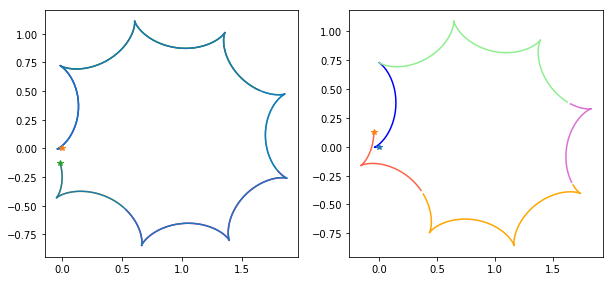

In [40]:
Np = np.ones(10)
u = 2.66
t = 1.61
x0 = [0.2,0.3,-0.45,-0.1,-0.2] # 参数为2个时间，3个相位
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[1])
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[0])
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[3])
traject_3(10,4,5,5,2,2,x0,t,Np,u)

In [114]:
fun = lambda x: (Fie_3(10,4,5,5,x[7],x[7],x[1:6],x[0],np.ones(10),x[6])[1][0]+Fie_3(10,4,5,5,x[7],x[7],x[1:6],x[0],np.ones(10),x[6])[1][1])+sum(Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1])*5
# 5*(Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1][0]+Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1][1]) sum(Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1])+

In [116]:
x0 = [1.61,0.2,0.3,-0.45,-0.1,-0.2,2.66,2]
bnds = ((1.5,2),(0, 0.7), (0, 0.7), (-1, 1), (-1, 1), (-1.2, 1.2) ,(2.5,3), (1,4))
res = minimize(fun, x0, method='TNC', bounds=bnds, tol=1e-12)
print(res.success)
print(res.x)

False
[ 1.65351396  0.18035116  0.22463944 -0.45479189 -0.097288   -0.23824331
  2.66321725  2.02538485]


[3.20331877e-02 3.36530018e-02 5.11439576e-05 7.25489601e-05
 4.09777776e-05 1.60574944e-05 9.90389566e-05 5.27221276e-05
 1.22035327e-04 7.71321918e-05]
0.9673176457662969
11.582670277882864
[0.0, 1.8035116101408513e-07, 4.049905988668114e-07, 1.2485233657139253e-06, 1.4731628035666517e-06, 1.6535139645807368e-06] [-0.4547918923460176, -0.09728799945337689, -0.23824330813226438, -0.09728799945337689, -0.4547918923460176] 0.18249374859921175 0.4092284059497476


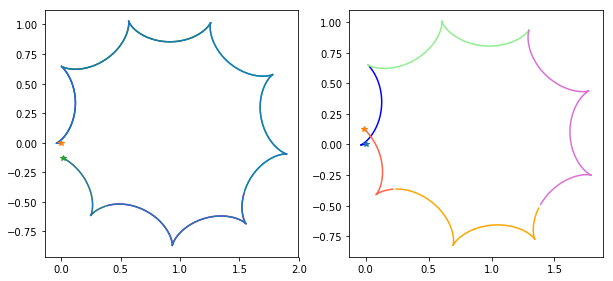

In [117]:
print(Fie_3(10,4,5,5,res.x[7],res.x[7],res.x[1:6],res.x[0],np.ones(10),res.x[6])[1])
print(Fie_3(10,4,5,5,res.x[7],res.x[7],res.x[1:6],res.x[0],np.ones(10),res.x[6])[0])
print(Fie_3(10,4,5,5,res.x[7],res.x[7],res.x[1:6],res.x[0],np.ones(10),res.x[6])[3])
traject_3(10,4,5,5,res.x[7],res.x[7],res.x[1:6],res.x[0],Np,res.x[6])

[3.46620230e-02 8.81947339e-02 2.21331795e-04 3.09425533e-04
 6.06860130e-05 2.38862258e-05 1.60940770e-04 8.62323585e-05
 2.52920355e-04 1.61459045e-04]
0.9669274518670028
12.514197447952718
[0.0, 5e-08, 2.5e-07, 5e-07, 1.11e-06, 1.3600000000000001e-06, 5e-08, 1.61e-06] [0, -0.45, -0.1, -0.2, -0.1, -0.45, 0] 0.053845819397993315 0.25307535117056856


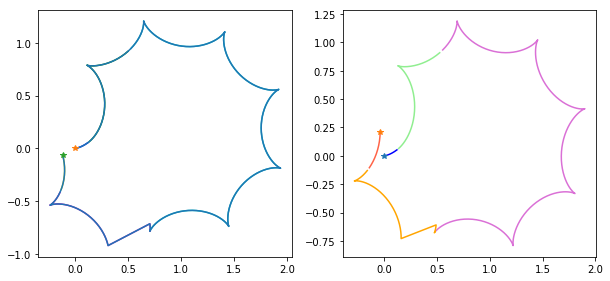

In [144]:
Np = np.ones(10)
u = 2.66
t = 1.61
x0 = [0.05,0.2,0.25,0,-0.45,-0.1,-0.2] # 参数为4个时间，5个相位
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[1])
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[0])
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[3])
traject_3(10,4,5,5,2,2,x0,t,Np,u)

In [174]:
fun = lambda x: 10*(Fie_3(10,4,5,5,2,2,x[1:8],x[0],np.ones(10),x[8])[1][0]+Fie_3(10,4,5,5,2,2,x[1:8],x[0],np.ones(10),x[8])[1][1])
# 5*(Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1][0]+Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1][1]) sum(Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1])+

In [175]:
x0 = [1.61,0.05,0.2,0.25,0,-0.45,-0.1,-0.2,2.66]
bnds = ((0,None) ,(0, 0.5), (0, 0.5), (0, 0.5), (-0.5, 0.5), (-0.5, 0.5), (-0.5, 0.5) ,(-0.5, 0.5), (2.5,3))
res = minimize(fun, x0, method='TNC', bounds=bnds, tol=1e-12)
print(res.success)
print(res.x)

False
[ 1.55102453  0.06786495  0.21870959  0.21266189 -0.09402447 -0.3478613
 -0.1959438  -0.24424991  2.69582756]


[2.93129838e-02 3.09527468e-02 3.93862538e-04 5.50708313e-04
 5.19657418e-05 2.06236673e-05 1.71638549e-04 9.28055294e-05
 3.62182692e-04 2.32751929e-04]
0.9675677634912774
13.133900579010245
[0.0, 6.786495457463254e-08, 2.865745483858402e-07, 4.992364410011952e-07, 1.0517880887413514e-06, 1.2644499813567066e-06, 6.786495457463254e-08, 1.5510245297425468e-06] [-0.09402447223712486, -0.3478612965473161, -0.19594380433222278, -0.2442499090064647, -0.19594380433222278, -0.3478612965473161, -0.09402447223712486] 0.07262275390098881 0.29049101560395524


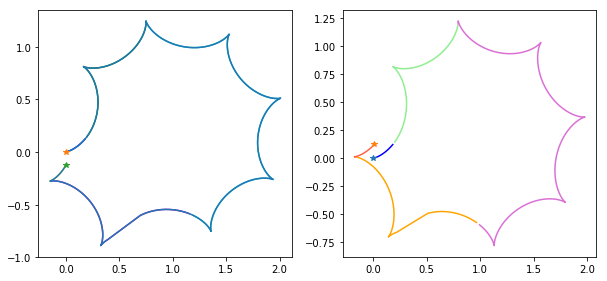

In [176]:
print(Fie_3(10,4,5,5,2,2,res.x[1:8],res.x[0],np.ones(10),res.x[8])[1])
print(Fie_3(10,4,5,5,2,2,res.x[1:8],res.x[0],np.ones(10),res.x[8])[0])
print(Fie_3(10,4,5,5,2,2,res.x[1:8],res.x[0],np.ones(10),res.x[8])[3])
traject_3(10,4,5,5,2,2,res.x[1:8],res.x[0],Np,res.x[8])

[1.08191780e-01 6.85898566e-03 2.95591601e-06 4.65420304e-06
 6.04866735e-05 2.36497372e-05 1.28499759e-04 6.80438997e-05
 1.10284318e-04 6.88067676e-05]
0.9739854877127528
10.110442537022168
[0.0, 5e-07, 1e-06, 1.6999999999999998e-06] [0, 0, 0] 0.5003315050167224 1.0006630100334448


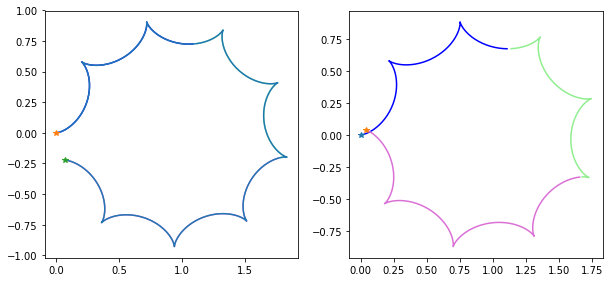

In [195]:
Np = np.ones(10)
u = 2.6
t = 1.7
x0 = [0.5,0.5,0,0,0] # 参数为2个时间，3个相位
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[1])
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[0])
print(Fie_3(10,4,5,5,2,2,x0,t,np.ones(10),u)[3])
traject_3(10,4,5,5,2,2,x0,t,Np,u)

In [204]:
fun = lambda x: 10*(Fie_3(10,4,5,5,2,2,x[1:6],x[0],np.ones(10),x[6])[1][0]+Fie_3(10,4,5,5,2,2,x[1:6],x[0],np.ones(10),x[6])[1][1])
# fun = lambda x: 10*(Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1][0]+Fie_3(10,4,5,5,2,2,x,t,np.ones(10),u)[1][1])
u = 2.6
t = 1.7


In [209]:
x0 = [1.7,0.5,0.5,0,0,0,2.6]
bnds = ((1.5, 2), (0, 0.8), (0, 0.8), (-1, 1), (-1, 1), (-1, 1), (2.4, 3))
res = minimize(fun, x0, method='TNC', bounds=bnds, tol=1e-12)
print(res.success)
print(res.x)

False
[ 1.61953796  0.53891542  0.45550377 -0.40436582 -0.01336345  0.24923537
  2.5686912 ]


[2.24309120e-02 2.56997294e-02 1.24495087e-04 1.74268137e-04
 1.92002133e-05 7.60547402e-06 6.07405559e-05 3.27924109e-05
 1.22376710e-04 7.85584864e-05]
0.9685599901447763
10.75629628280715
[0.0, 5.389154191890532e-07, 9.944191904318832e-07, 1.6195379631966136e-06] [-0.4043658211336216, -0.013363452292281709, 0.24923537189221517] 0.5416481482262921 0.9966325927363775


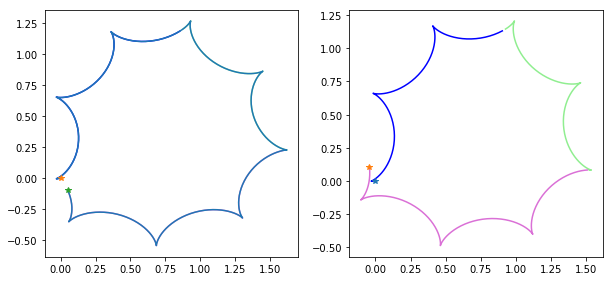

In [210]:
# print(Fie_3(10,4,5,5,2,2,res.x,t,np.ones(10),u)[1])
# print(Fie_3(10,4,5,5,2,2,res.x,t,np.ones(10),u)[0])
# print(Fie_3(10,4,5,5,2,2,res.x,t,np.ones(10),u)[3])
# traject_3(10,4,5,5,2,2,res.x,t,Np,u)
print(Fie_3(10,4,5,5,2,2,res.x[1:6],res.x[0],np.ones(10),res.x[6])[1])
print(Fie_3(10,4,5,5,2,2,res.x[1:6],res.x[0],np.ones(10),res.x[6])[0])
print(Fie_3(10,4,5,5,2,2,res.x[1:6],res.x[0],np.ones(10),res.x[6])[3])
traject_3(10,4,5,5,2,2,res.x[1:6],res.x[0],Np,res.x[6])